# Convolutional Neural Netwrok Models for Pneumonia Detection in X-Ray Images

<ol start="0">
<li>Train/Test Image Generation</li>
<li>LeNet</li>
<li>AlexNet</li>
<li>VGG16
  <ul style="list-style-type: decimal;">
    <li>VGG16 built-in Keras</li>
    <li>VGG16 Implemented from Scratch</li>
  </ul>
</li>
<li>InceptionV3 (built-in Keras)</li>
<li>ResNet (ResNet50)
  <ul style="list-style-type: decimal;">
    <li>Model: Built-in ResNet50 with only one Fully Connected Layer</li>
    <li>Model: Built-in base model nontrainable with only one added fully connected layer</li>
    <li>Model: Built-in Resnet50 with several normalisation layers added</li>
    <li>Data: Images with rotation/height/width adjusting, Model: Built-in Resnet50 with several normalisation layers added</li>
  </ul>
</li>
</ol>

In [1]:
# update libraries
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from utils import lenet, alexnet, InceptionV3, ResNet50, VGGNet, newmodel, DenseNet
import helper

2024-07-13 22:03:23.491237: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 22:03:23.493465: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 22:03:23.498476: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 22:03:23.551546: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-13 22:03:25.447542: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## 1. LeNet

In [2]:
# Generating data for LeNet input shape
train_generator = helper.datagen_train_dir("train", (32, 32))
test_generator = helper.datagen_test_dir("test", (32, 32))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
lenet_model = lenet.create_lenet_model()

# Compile the model
lenet_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,241 (239.22 KB)

 Trainable params: 61,241 (239.22 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
lenet_history = lenet_model.fit(train_generator, 
                                epochs=10, 
                                validation_data=test_generator)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 48s 274ms/step - accuracy: 0.7704 - loss: 0.4689 - val_accuracy: 0.8654 - val_loss: 0.3240
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 48s 280ms/step - accuracy: 0.8780 - loss: 0.2751 - val_accuracy: 0.8830 - val_loss: 0.3105
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 266ms/step - accuracy: 0.8880 - loss: 0.2615 - val_accuracy: 0.9006 - val_loss: 0.2614
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 47s 274ms/step - accuracy: 0.9030 - loss: 0.2352 - val_accuracy: 0.9167 - val_loss: 0.2412
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 261ms/step - accuracy: 0.9076 - loss: 0.2150 - val_accuracy: 0.9103 - val_loss: 0.2307
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 47s 274ms/step - accuracy: 0.9200 - loss: 0.2083 - val_accuracy: 0.8734 - val_loss: 0.3089
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 47s 275ms/step - accuracy: 0.9278 - loss: 0.1949 - val_accuracy: 0.8926 - val_loss: 0.2505
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 46s 272ms/step - accuracy: 0.9218 - loss: 0.1867 - val

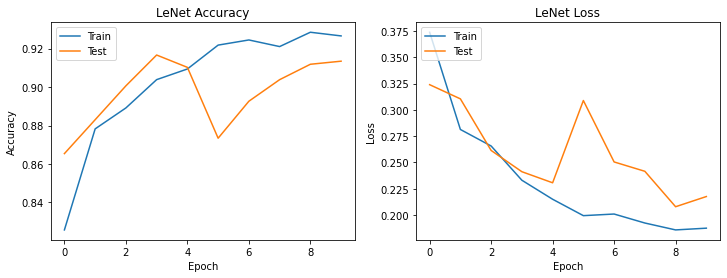

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
# plot accuracy and loss vs epoch
helper.plot_history(lenet_history, "LeNet")

### Plotting Confusion Matrix

/tmp/ipykernel_1189768/2668963123.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


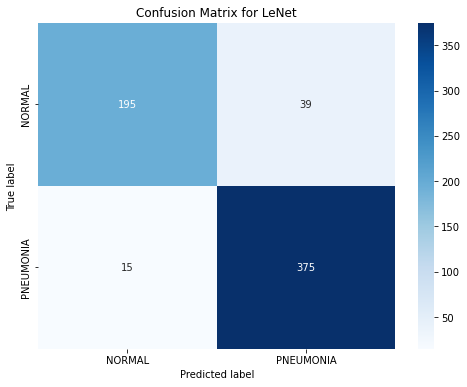

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "LeNet")

Classification Report for LeNet:
              precision    recall  f1-score   support

      NORMAL       0.93      0.83      0.88       234
   PNEUMONIA       0.91      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.91      0.91      0.91       624

Accuracy: 0.91


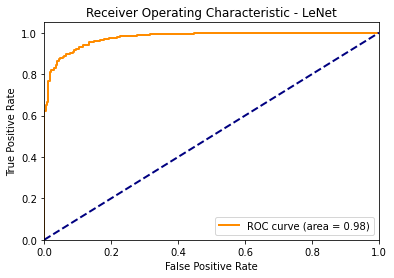

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for LeNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "LeNet")

## 2. AlexNet

In [8]:
# Generating data for AlexNet input shape
train_generator  = helper.datagen_train_dir("train",(32,32))
test_generator = helper.datagen_test_dir("test",(32,32))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
# Create AlexNet model
alexnet_model = alexnet.create_alexnet_model()

# Compile the model
alexnet_model.compile(optimizer=Adam(),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
alexnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,404,737 (16.80 MB)

 Trainable params: 4,404,737 (16.80 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
alexnet_history = alexnet_model.fit(train_generator, 
                                    epochs=10, 
                                    validation_data=test_generator)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 53s 300ms/step - accuracy: 0.7278 - loss: 0.5992 - val_accuracy: 0.6875 - val_loss: 0.5442
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 292ms/step - accuracy: 0.8440 - loss: 0.3522 - val_accuracy: 0.8622 - val_loss: 0.3171
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 298ms/step - accuracy: 0.8995 - loss: 0.2402 - val_accuracy: 0.8990 - val_loss: 0.2674
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 293ms/step - accuracy: 0.9150 - loss: 0.2007 - val_accuracy: 0.9151 - val_loss: 0.2038
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 52s 304ms/step - accuracy: 0.9188 - loss: 0.2040 - val_accuracy: 0.9311 - val_loss: 0.1645
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 296ms/step - accuracy: 0.9274 - loss: 0.1788 - val_accuracy: 0.9375 - val_loss: 0.1869
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 294ms/step - accuracy: 0.9420 - loss: 0.1502 - val_accuracy: 0.9279 - val_loss: 0.1786
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 299ms/step - accuracy: 0.9414 - loss: 0.1516 - val

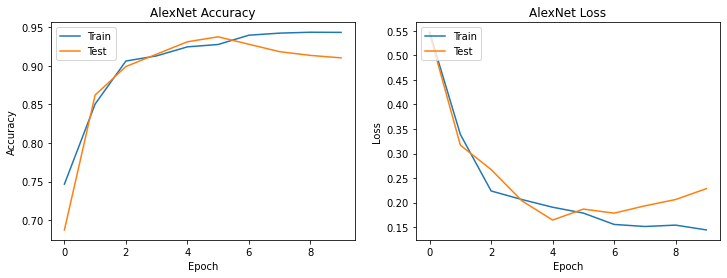

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
helper.plot_history(alexnet_history, "AlexNet")

### Plotting Confusion Matrix

/tmp/ipykernel_1189768/12124786.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


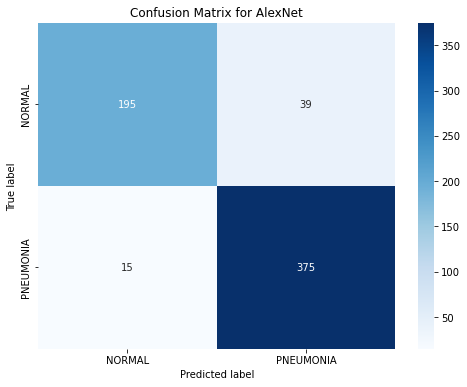

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "AlexNet")

Classification Report for AlexNet:
              precision    recall  f1-score   support

      NORMAL       0.93      0.83      0.88       234
   PNEUMONIA       0.91      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.91      0.91      0.91       624

Accuracy: 0.91


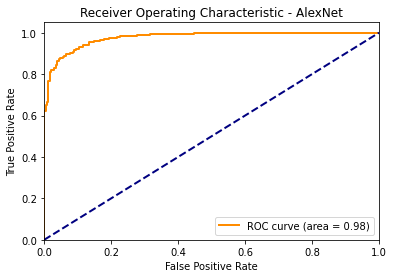

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for AlexNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "AlexNet")

## 3. VGG16

In [14]:
# Generating data for VGG input shape
train_generator  = helper.datagen_train_dir("train",(224,224))
test_generator = helper.datagen_test_dir("test",(224,224))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### 3.1. VGG16 built-in Keras

In [15]:
vgg_model = VGGNet.VGG()

# Compile the model
vgg_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

vgg_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 21,137,729 (80.63 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = vgg_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 1412s 9s/step - accuracy: 0.7288 - loss: 3.6224 - val_accuracy: 0.6250 - val_loss: 0.6515
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1402s 9s/step - accuracy: 0.7692 - loss: 0.4902 - val_accuracy: 0.8317 - val_loss: 0.3922
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1415s 9s/step - accuracy: 0.8724 - loss: 0.3123 - val_accuracy: 0.8590 - val_loss: 0.2838
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1402s 9s/step - accuracy: 0.9069 - loss: 0.2265 - val_accuracy: 0.8109 - val_loss: 0.4339
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 972s 6s/step - accuracy: 0.9050 - loss: 0.2195 - val_accuracy: 0.8397 - val_loss: 0.3702
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 694s 4s/step - accuracy: 0.9064 - loss: 0.2269 - val_accuracy: 0.8894 - val_loss: 0.2503
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 712s 4s/step - accuracy: 0.9133 - loss: 0.2179 - val_accuracy: 0.8574 - val_loss: 0.3163
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 717s 4s/step - accuracy: 0.8911 - loss: 0.2451 - val_accuracy: 0

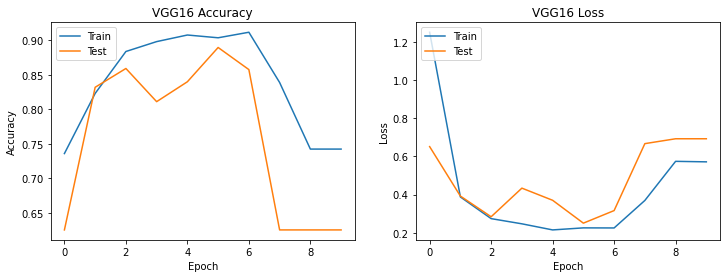

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
# plot accuracy and loss vs epoch
helper.plot_history(hist, "VGG16")

/tmp/ipykernel_1189768/3665347274.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


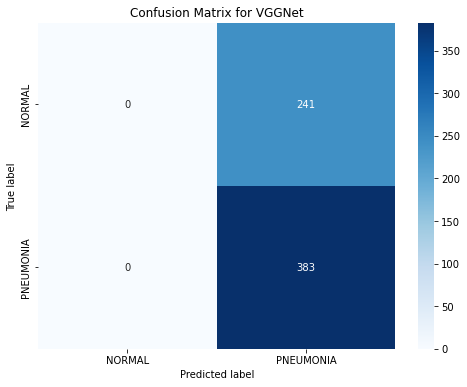

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(vgg_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "VGGNet")

Classification Report for VGGNet:
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       241
   PNEUMONIA       0.61      1.00      0.76       383

    accuracy                           0.61       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.38      0.61      0.47       624

Accuracy: 0.61


/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


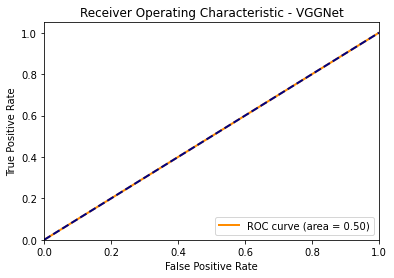

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for VGGNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC 
helper.plot_roc_auc(y_true, y_pred, "VGGNet")

### 3.2. VGG16 Implemented from Scratch

In [24]:
vgg16_model = VGGNet.VGG16_scratch()

# Compile the model
vgg16_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

vgg16_model.summary()

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 134,264,641 (512.18 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
hist = vgg16_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1046s 6s/step - accuracy: 0.7168 - loss: 0.6014 - val_accuracy: 0.6250 - val_loss: 0.7221
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 792s 5s/step - accuracy: 0.7465 - loss: 0.5681 - val_accuracy: 0.6250 - val_loss: 0.6812
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 757s 5s/step - accuracy: 0.7506 - loss: 0.5653 - val_accuracy: 0.6250 - val_loss: 0.7040
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 741s 4s/step - accuracy: 0.7491 - loss: 0.5641 - val_accuracy: 0.6250 - val_loss: 0.6686
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 762s 5s/step - accuracy: 0.7381 - loss: 0.5790 - val_accuracy: 0.6250 - val_loss: 0.7116
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 770s 5s/step - accuracy: 0.7521 - loss: 0.5602 - val_accuracy: 0.6250 - val_loss: 0.7190
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 781s 5s/step - accuracy: 0.7412 - loss: 0.5741 - val_accuracy: 0.6250 - val_loss: 0.7127
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 803s 5s/step - accuracy: 0.7461 - loss: 0.5673 - val_acc

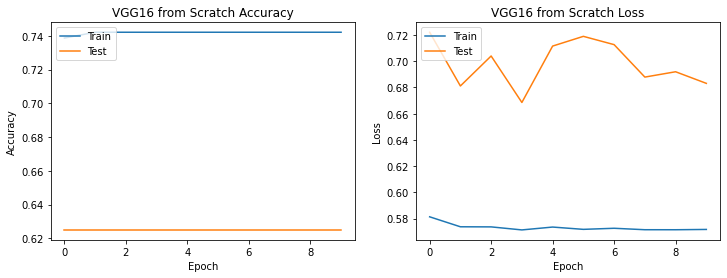

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
# plot accuracy and loss vs epoch
helper.plot_history(hist, "VGG16 from Scratch")

/tmp/ipykernel_1189768/3787558008.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


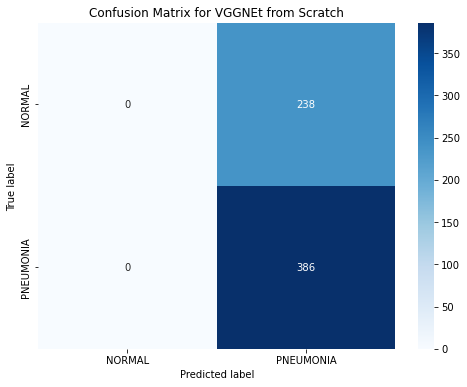

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(vgg16_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "VGGNEt from Scratch")

Classification Report for VGGNet:
              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       238
   PNEUMONIA       0.62      1.00      0.76       386

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.38      0.62      0.47       624

Accuracy: 0.62


/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


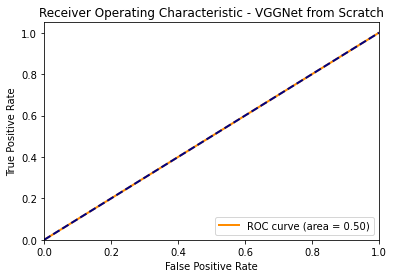

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for VGGNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "VGGNet from Scratch")

## 4. InceptionV3 (built-in Keras)

In [29]:
# Generating data for InceptionV3 w input shape (299,299,3)
train_generator  = helper.datagen_train_dir("train",(299, 299))
test_generator = helper.datagen_test_dir("test",(299, 299))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [30]:
InceptionV3_model = InceptionV3.Inception_V3()

# Compile the model
InceptionV3_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

InceptionV3_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [31]:
hist = InceptionV3_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 726s 4s/step - accuracy: 0.8955 - loss: 0.2961 - val_accuracy: 0.6170 - val_loss: 3.9150
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.9621 - loss: 0.1057 - val_accuracy: 0.3894 - val_loss: 4.3368
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 510s 3s/step - accuracy: 0.9660 - loss: 0.0969 - val_accuracy: 0.5929 - val_loss: 7.9834
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.9621 - loss: 0.1114 - val_accuracy: 0.6298 - val_loss: 40.7015
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 508s 3s/step - accuracy: 0.9658 - loss: 0.0934 - val_accuracy: 0.6635 - val_loss: 0.7731
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.9743 - loss: 0.0713 - val_accuracy: 0.8574 - val_loss: 0.4318
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 459s 3s/step - accuracy: 0.9765 - loss: 0.0822 - val_accuracy: 0.7147 - val_loss: 1.2209
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 476s 3s/step - accuracy: 0.9822 - loss: 0.0528 - val_accuracy: 0.90

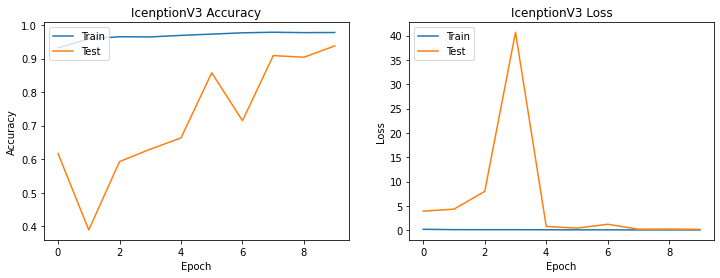

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [32]:
# plot accuracy and loss vs epoch
helper.plot_history(hist, "IcenptionV3")

/tmp/ipykernel_1189768/2552830903.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


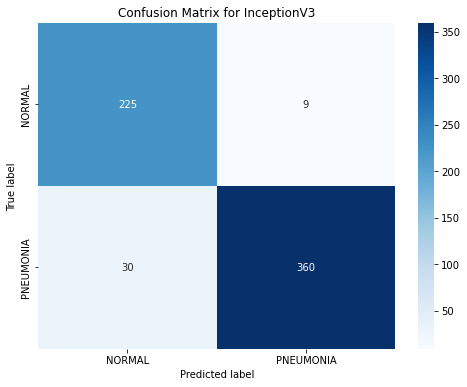

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(InceptionV3_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "InceptionV3")

Classification Report for InceptionV3:
              precision    recall  f1-score   support

      NORMAL       0.88      0.96      0.92       234
   PNEUMONIA       0.98      0.92      0.95       390

    accuracy                           0.94       624
   macro avg       0.93      0.94      0.93       624
weighted avg       0.94      0.94      0.94       624

Accuracy: 0.94


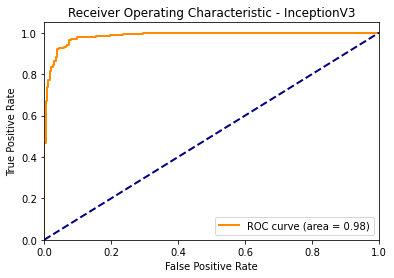

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [34]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "InceptionV3")

## 5. ResNet (ResNet50)

### 5.1. Model: Built-in ResNet50 with only one Fully Connected Layer

In [35]:
# Generating data for VGG input shape
train_generator  = helper.datagen_train_dir("train",(224, 224))
test_generator = helper.datagen_test_dir("test",(224, 224))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [38]:
resnet50_seq_model = ResNet50.resnet50_seq()

# Compile the model
resnet50_seq_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

resnet50_seq_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
resnet50_seq_history = resnet50_seq_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/164 ━━━━━━━━━━━━━━━━━━━━ 1:52 4s/step - accuracy: 0.9004 - loss: 0.2818

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_seq_history, "ResNet50")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(resnet50_seq_history.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

### 5.2. Built-in base model nontrainable with only one added fully connected layer

In [ ]:
resnet50_nontrain_model = ResNet50.resnet50_nontrain()

# Compile the model
resnet50_nontrain_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

resnet50_nontrain_model.summary()

In [ ]:
resnet50_nontrain_history = resnet50_nontrain_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_nontrain_history, "ResNet50")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(resnet50_nontrain_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

### 5.3. Model: Built-in Resnet50 with several normalisation layers added

In [ ]:
resnet50_normalised_model = ResNet50.resnet50_nontrain_normalised()

# Compile the model
resnet50_normalised_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

resnet50_normalised_model.summary()

In [ ]:
resnet50_normalised_history = resnet50_normalised_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_history, "ResNet50")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

### 5.4. Data: Images with rotation/height/width adjusting
###    Model: Built-in Resnet50 with several normalisation layers added

In [ ]:
train_dir = "train"
test_dir = "test"

# Data generators
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen_test = ImageDataGenerator(
    rescale=1./255
)

def datagen_train_dir(dir,in_shape):
    generator = datagen_train.flow_from_directory(
        dir,
        target_size=(in_shape[0], in_shape[1]), 
        batch_size= 32,
        class_mode='binary',  # Since class_mode is binary, labels will be 0 or 1
        classes=['not fractured', 'fractured']  # Specify the class labels explicitly
        )
    return generator

def datagen_test_dir(dir,in_shape):
    generator = datagen_test.flow_from_directory(
        dir,
        target_size=(in_shape[0], in_shape[1]), 
        batch_size=32,
        class_mode='binary',  # Since class_mode is binary, labels will be 0 or 1
        classes=['not fractured', 'fractured']  # Specify the class labels explicitly
        )
    return generator

# Generating data for VGG input shape
train_generator  = datagen_train_dir(train_dir,(224, 224))
test_generator = datagen_test_dir(test_dir,(224, 224))

In [ ]:
resnet50_normal_preprocess_model = ResNet50.resnet50_nontrain_normalised()

# Compile the model
resnet50_normal_preprocess_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

resnet50_normal_preprocess_model.summary()

In [ ]:
resnet50_normal_preprocess_history = resnet50_normal_preprocess_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_normal_preprocess_history, "ResNet50")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

 ## New Model

In [ ]:
# Generating data for LeNet input shape
train_generator = helper.datagen_train_dir("train", (32, 32))
test_generator = helper.datagen_test_dir("test", (32, 32))

In [ ]:
newmodel = newmodel.newmodel()

# Compile the model
newmodel.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

newmodel.summary()

In [ ]:
newmodel_history = newmodel.fit(train_generator, 
                                epochs=20, 
                                validation_data=test_generator)

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(newmodel_history, "New Model")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "New Model")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "New Model")

## 6. DesnNet

In [ ]:
# Generating data 
train_generator = helper.datagen_train_dir("train", (224, 224))
test_generator = helper.datagen_test_dir("test", (224, 224))

In [ ]:
densenet_model = DenseNet.densenet()

# Compile the model
densenet_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

densenet_model.summary()

In [ ]:
densenet_history = densenet_model.fit(train_generator, 
                                epochs=10, 
                                validation_data=test_generator)

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(densenet_history, "DenseNet")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "DenseNet")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "DenseNet")

## 

## Model Comparison

| Metric | LeNet | AlexNet | VGG  Built-In | VGG from Scratch | InceptionV3 | ResNet50 Built-in | ResNet50 Built-in & nontrain| ResNet  Built-in & nontrainable & Normalised | ResNet Built-in & nontrain  & normalised & Data adjusted |
|:------:|:-----:|:-------:|:-------------:|:----------------:|:-----------:|:-----------------:|:----------------------------:|:-------------------------------------------:|:-------------------------------------------------------:|
| Accuracy|   0.51   |     0.47    |         0.66      |        0.60         |        0.60      |         0.43          |                                         0.51   |      0.43    | 0.49
|Precesion|   0.53   |    0.51     |      0.36         |       0.36          |     0.56         |          0.49         |                                       0.55     |     0.49    | 0.56 
|Recall|   0.51   |     0.47    |         0.60      |        0.60         |      0.60        |          0.43         |                                       0.51     |      0.443   |  0.49
|F1-Score|    0.51  |     0.48    |       0.45        |        0.45         |     0.50         |            0.41       |                                        0.51    |     0.40     | 0.48

